<a href="https://colab.research.google.com/github/Das-tagiri/Farm-to-Fork-DApp-i/blob/main/Butterfly_Classifier_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset already exists!
Found 4 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 1.7437 - val_accuracy: 0.5000 - val_loss: 0.9757
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.5000 - loss: 1.3663 - val_accuracy: 0.2500 - val_loss: 0.8542
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5000 - loss: 0.7211 - val_accuracy: 0.0000e+00 - val_loss: 0.8240
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.7500 - loss: 0.6749 - val_accuracy: 0.5000 - val_loss: 0.8784
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step - accuracy: 0.2500 - loss: 1.4006 - val_accuracy: 0.5000 - val_loss: 1.0025


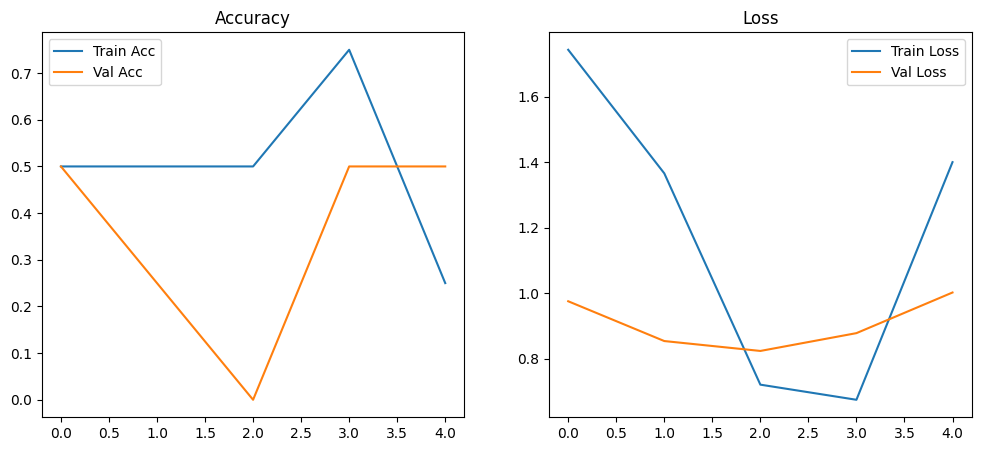

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.5000 - loss: 0.8691
✅ Test Accuracy: 50.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


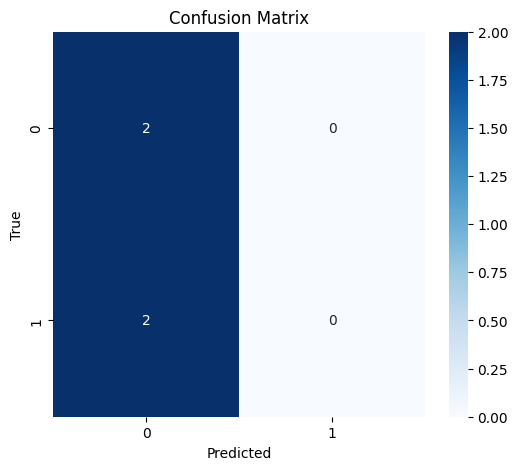

✅ Model saved to: /content/drive/MyDrive/butterfly_classifier_mobilenetv2.h5


Saving my_butterfly.jpg to my_butterfly (1).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


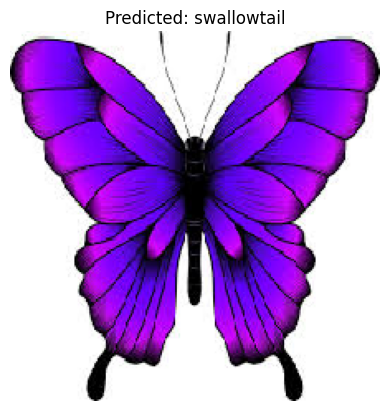

In [17]:
# 🧱 Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 📦 Step 2: Extract Dataset
import zipfile, os

zip_path = '/content/drive/MyDrive/butterfly_dataset_sample (1).zip'
extract_to = '/content/drive/MyDrive/butterfly_dataset_sample'

# Extract only if not already extracted
if not os.path.exists(os.path.join(extract_to, 'butterfly_dataset_sample')):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print("✅ Dataset extracted successfully!")
else:
    print("✅ Dataset already exists!")

# 📂 Step 3: Set data paths
base_path = '/content/drive/MyDrive/butterfly_dataset_sample/butterfly_dataset_sample'
train_dir = os.path.join(base_path, 'train')
val_dir = os.path.join(base_path, 'val')
test_dir = os.path.join(base_path, 'test')

# 📊 Step 4: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 🧪 Step 5: Data Generators
IMG_SIZE = 224
BATCH_SIZE = 8
EPOCHS = 5
NUM_CLASSES = len(os.listdir(train_dir))

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical')
val_generator = val_test_datagen.flow_from_directory(val_dir, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical')
test_generator = val_test_datagen.flow_from_directory(test_dir, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# 🧠 Step 6: Model
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 🏋️‍♂️ Step 7: Train
history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

# 📈 Step 8: Accuracy + Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

# 🧪 Step 9: Evaluate
loss, acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {acc * 100:.2f}%")

# 🔢 Step 10: Confusion Matrix
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 💾 Step 11: Save the model
model_path = '/content/drive/MyDrive/butterfly_classifier_mobilenetv2.h5'
model.save(model_path)
print(f"✅ Model saved to: {model_path}")

# 📸 Step 12: Predict a custom image
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()  # Upload a butterfly image (e.g., butterfly.jpg)

img_path = next(iter(uploaded))  # Get uploaded filename
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
class_idx = np.argmax(pred)
class_label = list(train_generator.class_indices.keys())[class_idx]

plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {class_label}")
plt.show()
